
 Saved: ../plots/assignment3_taskC.png

Summary:
  R_p: Input=1.2720, Retrieved=1.2720 ± 0.0004
  T: Input=1458.0000, Retrieved=1455.9087 ± 69.0677
  log(H₂O): Input=-3.9208, Retrieved=-3.9155 ± 0.2225


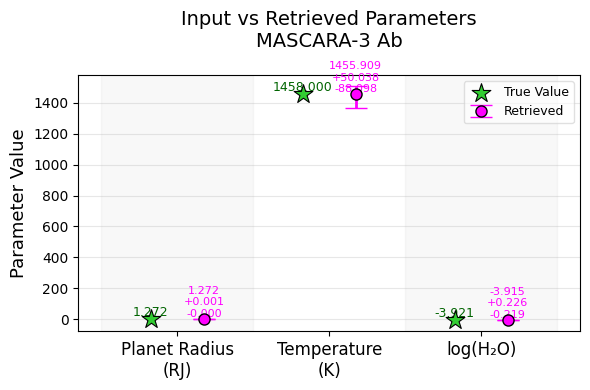

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Load retrieval results
f = h5py.File('../plots/taskC_retrieval.h5', 'r')
samples = f['Output']['Solutions']['solution0']['tracedata'][:]
weights = f['Output']['Solutions']['solution0']['weights'][:]
f.close()

# Filter valid samples
valid_idx = weights > 0
samples_valid = samples[valid_idx]

# Parameter info
param_labels = ['Planet Radius\n(RJ)', 'Temperature\n(K)', 'log(H₂O)']
param_short = ['R_p', 'T', 'log(H₂O)']

# true values
input_values = np.array([1.272, 1458, np.log10(1.2e-4)])

# retrieved values and errors
retrieved = []
errors_low = []
errors_high = []

for i in range(3):
    median = np.median(samples_valid[:, i])
    lower = np.percentile(samples_valid[:, i], 16)
    upper = np.percentile(samples_valid[:, i], 84)
    
    retrieved.append(median)
    errors_low.append(median - lower)
    errors_high.append(upper - median)

retrieved = np.array(retrieved)
errors_low = np.array(errors_low)
errors_high = np.array(errors_high)

# plot
fig, ax = plt.subplots(figsize=(6, 4))

x_pos = np.arange(len(param_labels))
width = 0.35

ax.scatter(x_pos - width/2, input_values, s=200, c='limegreen', marker='*',   
           label='True Value', zorder=4, edgecolors='black', linewidth=0.8)

# retrieved values
ax.errorbar(x_pos + width/2, retrieved, 
            yerr=[errors_low, errors_high],
            fmt='o', markersize=8, c='fuchsia', capsize=8, capthick=2,  
            label='Retrieved', zorder=4, markeredgecolor='black', 
            markeredgewidth=1, elinewidth=2)

for i, (inp, ret, err_low, err_high) in enumerate(zip(input_values, retrieved, errors_low, errors_high)):
    # Input value label (lime green)
    ax.text(i - width/2, inp, f'{inp:.3f}', 
            ha='center', va='bottom', fontsize=9, color='darkgreen')
    
    ax.text(i + width/2, ret, f'{ret:.3f}\n+{err_high:.3f}\n-{err_low:.3f}', 
            ha='center', va='bottom', fontsize=8, color='magenta')

ax.set_xticks(x_pos)
ax.set_xticklabels(param_labels, fontsize=12)
ax.set_ylabel('Parameter Value', fontsize=13)
ax.set_title('Input vs Retrieved Parameters\nMASCARA-3 Ab', 
             fontsize=14, pad=20)
ax.legend(fontsize=9, loc='upper right', framealpha=0.6)
ax.grid(True, alpha=0.3, axis='y')

# diff background for each parameter
for i in range(len(param_labels)):
    if i % 2 == 0:
        ax.axvspan(i - 0.5, i + 0.5, alpha=0.05, color='gray')

plt.tight_layout()
plt.savefig('../plots/assignment3_taskC.png', dpi=200, bbox_inches='tight')
print("\n Saved: ../plots/assignment3_taskC.png")
print("\nSummary:")
for i, label in enumerate(param_short):
    print(f"  {label}: Input={input_values[i]:.4f}, Retrieved={retrieved[i]:.4f} ± {(errors_low[i]+errors_high[i])/2:.4f}")
